# 🎉 Text2FX demo 🎉

From ___Text2FX: Harnessing CLAP Embeddings for Text-Guided Audio Effects___ [(arXiv link)](https://arxiv.org/abs/2409.18847)

Annie Chu, Patrick O'Reilly, Julia Barnett, Bryan Pardo

In [1]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
from audiotools import AudioSignal #for playback

import text2fx
from text2fx.apply import main as apply 
from text2fx.applybatch import main as applybatch
from text2fx.applyFXparams import apply_fx_to_sig as applyFX

## Usage

### Running Text2FX for a Single (Audio File, Target Text Descriptor) Pair

Use the `apply()` function to process an input audio file with a target text descriptor and optimize effects parameters accordingly.

#### **Inputs**
- **`audio_path`** *(str | Path | AudioSignal)*:  Path to the input audio file or an `AudioSignal` object.  
- **`fx_chain`** *(List[str])*: A list of effect names (e.g., `["reverb", "distortion"]`) defining the FX processing chain.  
- **`text_target`** *(str)*: A textual descriptor of the desired audio transformation (e.g., `"warm and deep reverb"`).

_OPTIONAL_
- **`export_dir`** *(str, optional)*:  Directory where output files (`.wav` and `.json`) should be saved. Default is `None`.
- **`learning_rate`** *(float, optional)*:  Learning rate for optimizing FX parameters. Default is `0.01`.  
- **`params_init_type`** *(str, optional)*:  Initialization type for FX parameters (e.g.,`'random'`, `'zeros'`). Default is `'random'`.  
- **`roll_amt`** *(int, optional)*: Amount by which to shift/roll the audio samples at each iteration. Default is `None`.  
- **`n_iters`** *(int, optional)*: Number of optimization iterations. Default is `600`.  
- **`criterion`** *(str, optional)*: Loss function used for optimization. Default is `'cosine-sim'`.  
- **`model`** *(str, optional)*: Model used for feature extraction. Default is `'ms_clap'`.  
- **`detailed_log`** *(bool, optional)*: Whether to log FX parameters every 100 iterations. Default is `False`.  

#### **Returns**  
The function outputs:  
- **`output_audio`** *(AudioSignal)*: The optimized, transformed audio signal with optimized FX parameters applied.  
- **`optimized_FXparams`** *(torch.Tensor)*: A tensor containing the optimized FX parameters for a given FX chain.  
- **`optimized_FXparams_dict`** *(dict)*: A dictionary of FX parameters for each FX in the FX chain, rescaled to match appropriate ranges for each FX.  

In [2]:
# apply? #uncomment to view signature


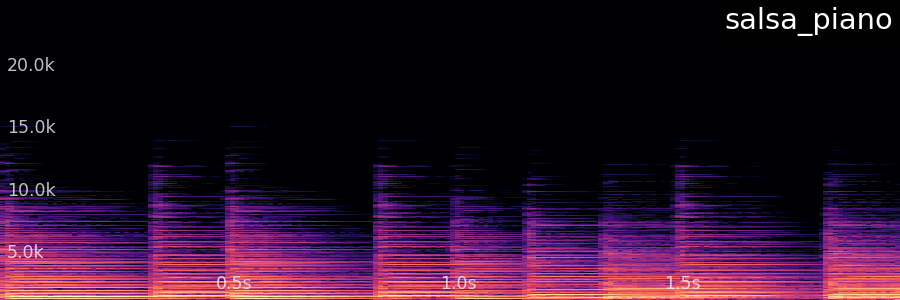
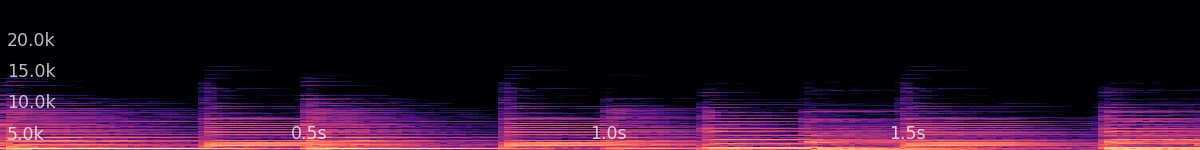

text2fx on full sig
1. processing input ... /home/annie/research/text2fx/notebooks/audio/salsa_piano.wav
2. created channel from ['eq'] ... [<dasp_pytorch.modules.ParametricEQ object at 0x7f684ca79f40>]
3. applying text2fx ..., target muffled


step: 600/600, loss: 0.808: 100%|███| 600/600 [00:35<00:00, 16.75it/s]



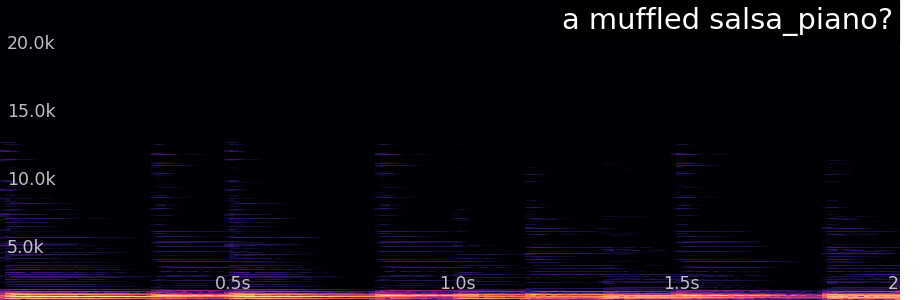
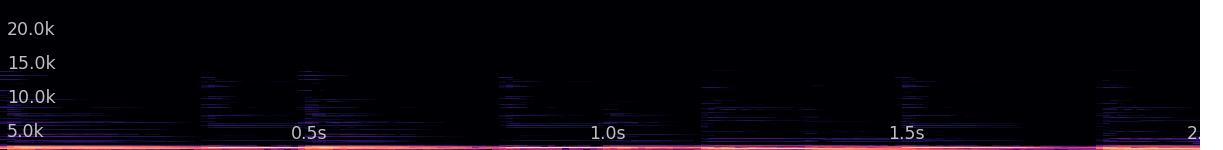

{'ParametricEQ': {'low_shelf_gain_db': tensor([14.7036]), 'low_shelf_cutoff_freq': tensor([548.4904]), 'low_shelf_q_factor': tensor([5.4379]), 'band0_gain_db': tensor([-18.4040]), 'band0_cutoff_freq': tensor([1042.9497]), 'band0_q_factor': tensor([2.5280]), 'band1_gain_db': tensor([-19.1945]), 'band1_cutoff_freq': tensor([2488.9143]), 'band1_q_factor': tensor([0.5331]), 'band2_gain_db': tensor([19.1355]), 'band2_cutoff_freq': tensor([11640.6807]), 'band2_q_factor': tensor([5.6459]), 'band3_gain_db': tensor([-18.3193]), 'band3_cutoff_freq': tensor([13638.6943]), 'band3_q_factor': tensor([4.4793]), 'high_shelf_gain_db': tensor([-13.9098]), 'high_shelf_cutoff_freq': tensor([13012.6875]), 'high_shelf_q_factor': tensor([5.3080])}}


In [3]:
# -- Inputs: Audio 
audio_path = Path(os.path.abspath('')) / 'audio' / 'salsa_piano.wav'
AudioSignal(audio_path).widget(f'{audio_path.stem}') # play input sound

# -- Inputs: Target Text (How do we want our input audio to sound? e.g., warm? warm AND cozy? like it's coming through an old telephone?)
target_text = 'muffled'

# -- Inputs: FX chain (What FX do we want to use?)
FX_chain = ['eq'] #['eq', 'reverb']

# ====== Text2FX it! ===========
out_sig, out_params, out_params_dict = apply(audio_path, FX_chain, target_text)

# -- Outputs
out_sig.widget(f'a {target_text} {audio_path.stem}?')     # Play raw output sound
print(out_params_dict)  # Print optimized FX params

### Applying Optimized FX Parameters to Any Audio Source  

Use the `applyFX()` function to apply previously optimized FX parameters to a new audio file.  

#### **Use Case**  
If you've optimized FX parameters using Text2FX and want to apply the same settings to another audio file, you can use this function with the saved JSON file (exported as `optimized_FXparams_dict`)

#### **Inputs**  
- **`audio_source`** *(AudioSignal | str | Path | List[str] | List[Path])*: The input audio file(s) or directory containing audio files.  
- **`params_dict`** *(str | Path | dict)*: A dictionary of effect parameters or a path to a JSON file containing FX settings.  
- **`export_path`** *(str, optional)*: Path where the processed audio will be saved. Default is `None`.  

#### **Outputs**  
- **Processed Audio**: The function returns the processed audio with FX parameters applied as an `AudioSignal` object.  
- **Optional Export**: If `export_path` is specified, the processed audio will be saved as `"exported_output.wav"` in the provided path.

#### **Effect Parameter Format**  
The `params_dict` should be structured as follows:  
```json
{
    "Effect1": {"param1": value1, "param2": value2},
    "Effect2": {"param1": value3, "param2": value4}
} 
```

In [6]:
#applyFX? #uncomment to view signature

/home/annie/research/text2fx/notebooks/audio/salsa_piano.wav is a file
duration: 2.004 seconds
batch_size: 1
path: /home/annie/research/text2fx/notebooks/audio/salsa_piano.wav
sample_rate: 48000
num_channels: 2
audio_data.shape: torch.Size([1, 2, 96171])
stft_params: STFTParams(window_length=2048, hop_length=512, window_type='hann', match_stride=False, padding_type='reflect')
device: cpu
 is AudioSignal



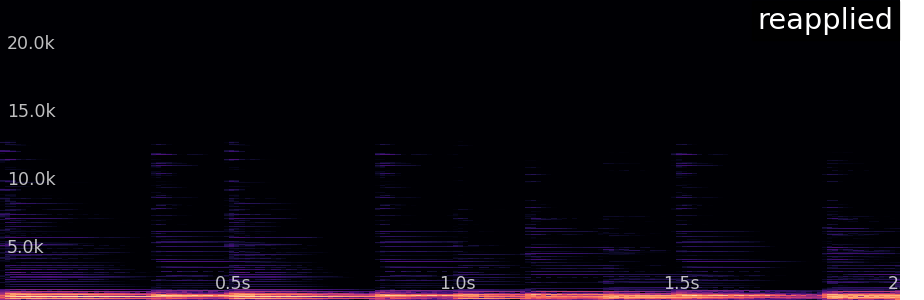
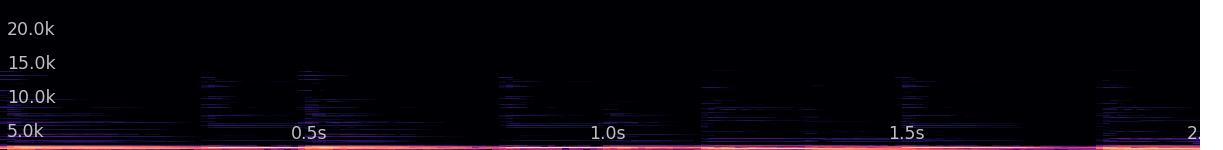

In [7]:
# Reapply FX parameters (out_params_dict) directly to an audio file
out = applyFX(audio_path, out_params_dict)
# out.cpu().widget('reapplied')

# Reapply FX parameters to an AudioSignal instance
out1 = applyFX(AudioSignal(audio_path), out_params_dict)
out1.cpu().widget('reapplied')

# Reapply FX parameters from a saved JSON file to an audio file
# (if you previously exported parameters using apply() or applybatch())
path_to_fx_dict = "ENTER JSON PATH HERE"
# out2 = applyFX(audio_path, path_to_fx_dict) 

### Plotting Freq Responses via text2fx.core_plotting

#### To quickly compare the input and Text2FX'd output audio

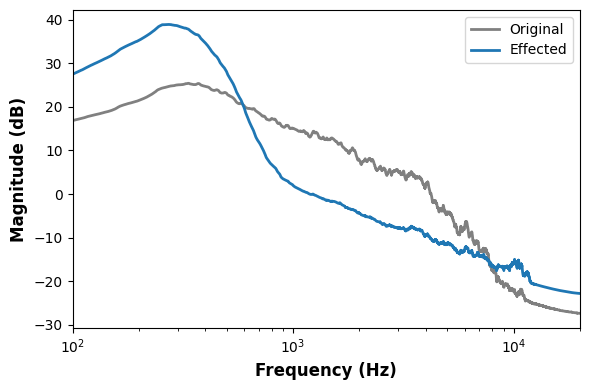

In [8]:
from text2fx.core_plotting import plot_response, plot_response_files

# plot input vs output AudioSignals
plot_response(AudioSignal(audio_path), out)

# also option to plot directly from .wav audio paths
# example: plot_response_files(file1.wav, file2.wav)

#### If you set `detailed_log = True`, you can also plot the freq responses for all the logged iters

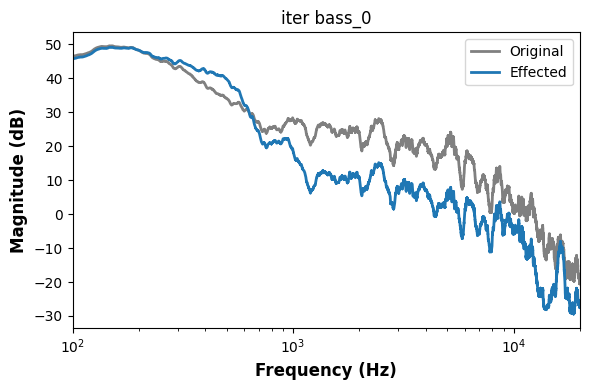

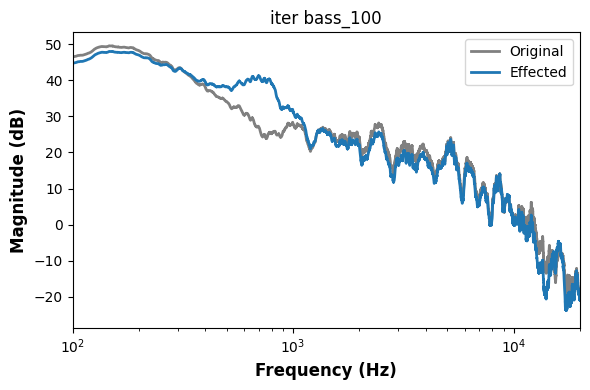

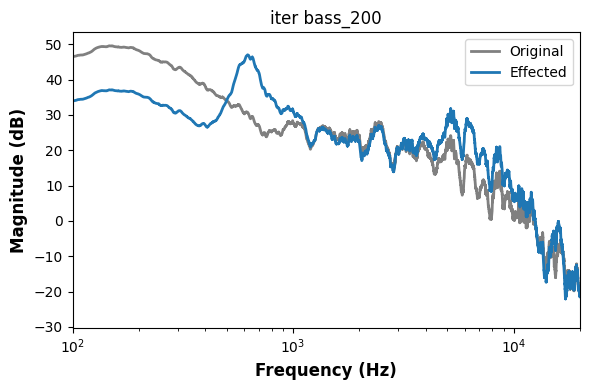

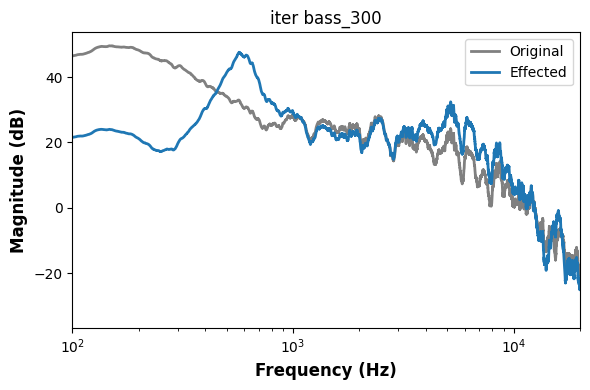

In [9]:
#visualizing detailed_log = True --  in_sig, every 100_iters, final_sig
from text2fx.core_plotting import plot_all_iters
EXAMPLE_RUN_DIR =  Path(os.path.abspath('')) / 'example_run' / 'tinny-004'
plot_all_iters(EXAMPLE_RUN_DIR)

### Running Text2FX for Multiple (audio, text) Pairs (i.e. batching)

Use the `applybatch()` function to process any cases where there are multiple audio files or multiple target text descriptors. For example, 

- **Case 1**: 1 audio file, _n_ text targets  
- **Case 2**: A directory of _n_ audio files, 1 text target  
- **Case 3**: A directory of _n_ audio files, _n_ text targets

**Note**: The batch loss is calculated as the mean loss across all samples.

Outputs same as `apply()`

In [10]:
#applybatch? #uncomment to view signature

In [11]:
# 1 audio_file, n text_targets
applybatch(
    audio_path, #single file
    ['warm', 'cold', 'like a worm'], #list of targets, can also provide .txt file
    fx_chain = ['eq']) #setting FX chain

audio source paths: [PosixPath('/home/annie/research/text2fx/notebooks/audio/salsa_piano.wav')], descriptor: ['warm', 'cold', 'like a worm']


step: 600/600, loss: 0.895: 100%|███| 600/600 [00:37<00:00, 15.81it/s]


(<audiotools.core.audio_signal.AudioSignal at 0x7f66f9cf5fa0>,
 tensor([[-1.1648, -0.0465, -0.7127, -0.0661,  1.5973, -0.1791, -0.4400,  0.3713,
          -2.9163,  1.5278,  0.6920, -1.5124,  0.7818, -2.0060,  0.4606,  2.7136,
          -0.2026, -1.0096],
         [ 0.9467,  0.3031,  0.5248,  1.4979, -1.4970, -0.3503, -1.4026, -0.5189,
          -0.8190,  0.3698, -0.9463,  1.4551,  1.7137, -0.2527,  0.5958, -1.8880,
           0.9187,  0.9970],
         [ 1.5407,  0.1023,  1.5281,  0.1430, -1.4224,  1.7354, -0.0210,  0.2074,
          -1.2111, -2.4761,  0.5656,  2.2365,  0.6000, -0.0828,  0.2187,  0.2661,
           1.6165,  0.1913]]),
 {'ParametricEQ': {'low_shelf_gain_db': tensor([-10.4881,   8.8182,  12.9429]),
   'low_shelf_cutoff_freq': tensor([ 986.9909, 1158.8915, 1060.6061]),
   'low_shelf_q_factor': tensor([2.0412, 3.8068, 4.9482]),
   'band0_gain_db': tensor([-0.6608, 12.6903,  1.4275]),
   'band0_cutoff_freq': tensor([1676.7617,  431.1062,  453.0387]),
   'band0_q_factor': t

In [12]:
# a directory of n files, 1 text_target
EXAMPLES_DIR = Path(os.path.abspath('')) / 'audio'
print(text2fx.core.load_examples(EXAMPLES_DIR)) #viewing all the files

applybatch(
    EXAMPLES_DIR,
    ['muffled under a blanket'], #input can also be a .txt file of single-line words
    fx_chain = ['eq', 'reverb'])

[PosixPath('/home/annie/research/text2fx/notebooks/audio/salsa_piano.wav'), PosixPath('/home/annie/research/text2fx/notebooks/audio/speech.wav'), PosixPath('/home/annie/research/text2fx/notebooks/audio/guitar.wav'), PosixPath('/home/annie/research/text2fx/notebooks/audio/lounge_loop.wav')]
audio source paths: [PosixPath('/home/annie/research/text2fx/notebooks/audio/salsa_piano.wav'), PosixPath('/home/annie/research/text2fx/notebooks/audio/speech.wav'), PosixPath('/home/annie/research/text2fx/notebooks/audio/guitar.wav'), PosixPath('/home/annie/research/text2fx/notebooks/audio/lounge_loop.wav')], descriptor: ['muffled under a blanket']


step: 600/600, loss: 0.850: 100%|█| 600/6


(<audiotools.core.audio_signal.AudioSignal at 0x7f66f9c8eb50>,
 tensor([[ 1.5168e+00, -6.7375e-01,  4.7979e-01,  1.7363e+00, -1.3266e+00,
           3.9191e-01, -1.6054e+00, -5.9421e-01,  2.8313e-01, -1.7465e+00,
          -1.0091e+00,  1.1883e-01, -5.9467e-01,  9.8347e-01,  1.2753e+00,
           8.9565e-01,  1.9804e+00,  2.6896e+00, -1.6978e-01, -1.5569e+00,
           2.6274e-01,  2.4903e+00,  2.0640e+00,  8.6583e-02, -2.5405e+00,
          -2.0397e-02,  1.8864e+00, -2.4287e-01,  6.6188e-01,  1.8809e+00,
          -2.0966e+00, -2.9549e-01, -9.0084e-01,  3.1330e-01, -2.7762e-01,
           4.5707e-02, -5.9851e-01,  7.2857e-01, -1.8507e-01, -1.3239e+00,
          -1.9205e+00,  9.3965e-01, -5.1015e-01],
         [ 2.5989e-01, -2.4568e-01,  1.6551e-01,  2.0435e+00, -7.0657e-01,
          -6.2685e-01,  3.7950e-01, -5.8611e-03,  4.3616e-01, -7.7784e-02,
          -2.5169e+00, -2.0109e-01,  3.4966e-01, -4.4930e-01, -8.2906e-03,
          -1.6646e+00, -8.6117e-01,  5.0158e-01,  1.9460e+00, 

In [13]:
#### n audio_files, n_text_targets
applybatch(
    EXAMPLES_DIR,
    ['muffled under a blanket', 'warm', 'bright like a horn', 'thin and hollow'], #input can also be a .txt file of single-line words
    fx_chain = ['eq'])

audio source paths: [PosixPath('/home/annie/research/text2fx/notebooks/audio/salsa_piano.wav'), PosixPath('/home/annie/research/text2fx/notebooks/audio/speech.wav'), PosixPath('/home/annie/research/text2fx/notebooks/audio/guitar.wav'), PosixPath('/home/annie/research/text2fx/notebooks/audio/lounge_loop.wav')], descriptor: ['muffled under a blanket', 'warm', 'bright like a horn', 'thin and hollow']


step: 600/600, loss: 0.876: 100%|█| 600/6


(<audiotools.core.audio_signal.AudioSignal at 0x7f66f9c069d0>,
 tensor([[ 1.3531e+00, -1.1246e-01, -6.3386e-01, -7.2012e-01,  4.7506e-01,
          -9.3424e-01, -5.9799e-01, -1.1389e+00, -2.3001e+00, -5.4884e-01,
           7.4123e-01,  1.4508e+00, -1.3484e+00,  1.1069e+00, -7.0939e-01,
          -1.9297e+00,  1.0868e+00,  4.0466e-01],
         [-4.5444e-01, -4.4551e-01,  1.1323e+00,  1.4073e+00,  6.2818e-02,
           6.3049e-01, -4.3341e-01, -1.1290e+00, -2.4558e-01,  9.7207e-01,
          -1.6337e+00,  1.1359e+00,  1.4573e+00, -3.9213e-01, -4.7016e-01,
           1.7663e+00, -2.2956e+00,  8.3031e-02],
         [-1.0682e+00, -1.0964e+00,  2.0059e+00,  6.0001e-01,  3.2524e-01,
          -1.6799e+00,  5.3716e-01, -1.9325e-01, -2.0576e+00,  6.9995e-01,
          -2.8585e-01, -4.1311e-01, -5.5272e-01, -1.7347e+00,  7.8480e-02,
          -7.6962e-01, -5.4631e-01,  2.7331e-01],
         [ 2.3180e-02,  9.6487e-01,  9.5661e-01, -1.5921e+00,  1.3566e+00,
           8.2242e-01, -9.0727e-01, -